In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from collections import Counter
from wordcloud import WordCloud

In [ ]:
data_path = '../data/'

In [11]:
hate_df = pd.read_csv(data_path + 'Train_Hate_All.csv')
attack_df = pd.read_csv(data_path + 'Train_Attack_All.csv')
hate_df.head()

,tweet,Hate_Speech
0,"@RexHuppke Ah fuck him, sounds like he'll be d...",0
1,@mariaaraujo98 @Val_Voshchevska @angelasingh24...,1
2,@GenePark @myhlee @PostBaron @mboorstein Don't...,0
3,@peterbakernyt Sanders can choke on his dandruff.,0
4,@realDonaldTrump @FoxNews Fox News aka the Tru...,0


In [61]:
print('{:2.2%} Personal Attack'.format(len(attack_df[attack_df['Personal_Attack'] == 1]) / len(attack_df)))
print('{:2.2%} Hate Speech'.format(len(hate_df[hate_df['Hate_Speech'] == 1]) / len(hate_df)))

28.10% Personal Attack
6.09% Hate Speech


In [109]:
# top 50 keywords
top_hate_words = Counter(" ".join(hate_df[hate_df['Hate_Speech'] == 1]['tweet']).split()).most_common(10000)
top_nonhate_words = Counter(" ".join(hate_df[hate_df['Hate_Speech'] == 0]['tweet']).split()).most_common(10000)
top_attack_words = Counter(" ".join(attack_df[attack_df['Personal_Attack'] == 1]['tweet']).split()).most_common(10000)
top_nonattack_words = Counter(" ".join(attack_df[attack_df['Personal_Attack'] == 0]['tweet']).split()).most_common(10000)

# filter stop words
stop_words = set(stopwords.words('english'))
stop_words.add('.')
stop_words.add('-')
stop_words.add('?')
stop_words.add('&')
stop_words.add('0')
ALPHABET = 'abcdefghijklmnopqrstuvwxyz'

top_hate_words = [x for x in top_hate_words if x[0].lower() not in stop_words]
top_nonhate_words = [x for x in top_nonhate_words if x[0].lower() not in stop_words]
top_attack_words = [x for x in top_attack_words if x[0].lower() not in stop_words]
top_nonattack_words = [x for x in top_nonattack_words if x[0].lower() not in stop_words]


# get top 50 keywords
top_hate_keywords = {x[0]:x[1] for x in top_hate_words if '@' not in x[0] and '#' not in x[0]}
top_nonhate_keywords = {x[0]:x[1] for x in top_nonhate_words if '@' not in x[0] and '#' not in x[0]}
top_attack_keywords = {x[0]:x[1] for x in top_attack_words if '@' not in x[0] and '#' not in x[0]}
top_nonattack_keywords = {x[0]:x[1] for x in top_nonattack_words if '@' not in x[0] and '#' not in x[0]}

# get top 50 hashtags
top_hate_hashtags = {x[0]:x[1] for x in top_hate_words if '#' in x[0] and (len(x[0]) > 2 and x[0][1] in ALPHABET)}
top_nonhate_hashtags = {x[0]:x[1] for x in top_nonhate_words if '#' in x[0] and (len(x[0]) > 2 and x[0][1] in ALPHABET)}
top_attack_hashtags = {x[0]:x[1] for x in top_attack_words if '#' in x[0] and (len(x[0]) > 2 and x[0][1] in ALPHABET)}
top_nonattack_hashtags = {x[0]:x[1] for x in top_nonattack_words if '#' in x[0] and (len(x[0]) > 2 and x[0][1] in ALPHABET)}

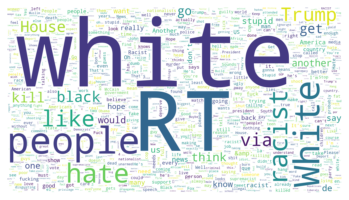

In [113]:
# generate word cloud
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=1800,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False, background_color='white').generate_from_frequencies(top_nonhate_keywords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

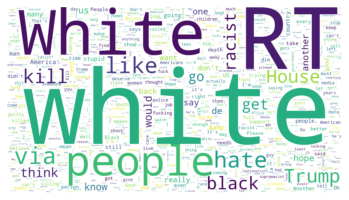

In [114]:
wordcloud = WordCloud(width=1800,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False, background_color='white').generate_from_frequencies(top_nonattack_keywords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

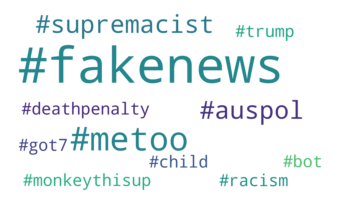

In [115]:
wordcloud = WordCloud(width=1800,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False, background_color='white').generate_from_frequencies(top_nonhate_hashtags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

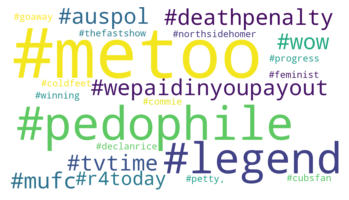

In [112]:
wordcloud = WordCloud(width=1800,height=1000, max_words=1628,relative_scaling=1,normalize_plurals=False, background_color='white').generate_from_frequencies(top_nonattack_hashtags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
# txt file with top 50 of each
f = open('top50.txt', 'w')
f.write('==== Top 50 Keywords ====\n')
f.write('== Hate Speech ==\n')
count = 0
for key in top_hate_keywords.keys():
    f.write(key + " " + str(top_hate_keywords[key]) +  '\n')
    count += 1
    if count == 50:
        break
        
f.write('== Attack Speech ==\n')
count = 0
for key in top_attack_keywords.keys():
    f.write(key + " " + str(top_attack_keywords[key]) +  '\n')
    count += 1
    if count == 50:
        break
    
f.write('==== Top 50 Hashtags ====\n')
f.write('== Hate Speech ==\n')
count = 0
for key in top_hate_hashtags.keys():
    f.write(key + " " + str(top_hate_hashtags[key]) +  '\n')
    count += 1
    if count == 50:
        break
        
f.write('== Attack Speech ==\n')
count = 0
for key in top_attack_hashtags.keys():
    f.write(key + " " + str(top_attack_hashtags[key]) +  '\n')
    count += 1
    if count == 50:
        break
f.close()